In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
df = pd.read_csv("dcc_data.csv")
df.pop('Company #')
df
df = df.loc[df['Public/Private'] == 1]
df = df.reset_index(drop = True)

In [269]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing

le = LabelEncoder()
le.fit(df['Industry'])
df['Industry'] = le.transform(df['Industry'])

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Industry']]).toarray(), columns=list(le.classes_))
df = df.join(enc_df)
df.pop('Industry');



In [270]:
y = df['Purchase Channel']
X = df.drop('Purchase Channel', axis= 1)
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=list(df.columns[1:]))
X_scaled.insert(0, 'Purchase Channel', y)
X_scaled


,Purchase Channel,# of Employees (log10),Annual Revenue (log10),Public/Private,Majority Employee Age Range,Subjective CSR Availability Score (out of 5),Advertising,Education,Financial Services,Food and Beverage,Healthcare,Hospitality,IT,Manufacturing,Real Estate,Retail
0,1,0.265210,0.265210,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.147300,0.147296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.135765,0.135773,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.157618,0.157624,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.190571,0.190570,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,0.400975,0.400983,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,0.039709,0.039710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,0.422828,0.422834,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.281419,0.281423,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.000000,0.000000,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [271]:
# channel = df['Purchase Channel']
# df.pop('Purchase Channel')
# df['Purchase Channel']= channel
# df

Purchase Channel                                1.000000
# of Employees (log10)                          0.192595
Annual Revenue (log10)                          0.192585
Public/Private                                       NaN
Majority Employee Age Range                    -0.066577
Subjective CSR Availability Score (out of 5)    0.000750
Advertising                                     0.008671
Education                                       0.103661
Financial Services                              0.177758
Food and Beverage                               0.008671
Healthcare                                     -0.066886
Hospitality                                     0.177758
IT                                             -0.160415
Manufacturing                                   0.166436
Real Estate                                    -0.054841
Retail                                         -0.281366
Name: Purchase Channel, dtype: float64


<Axes: >

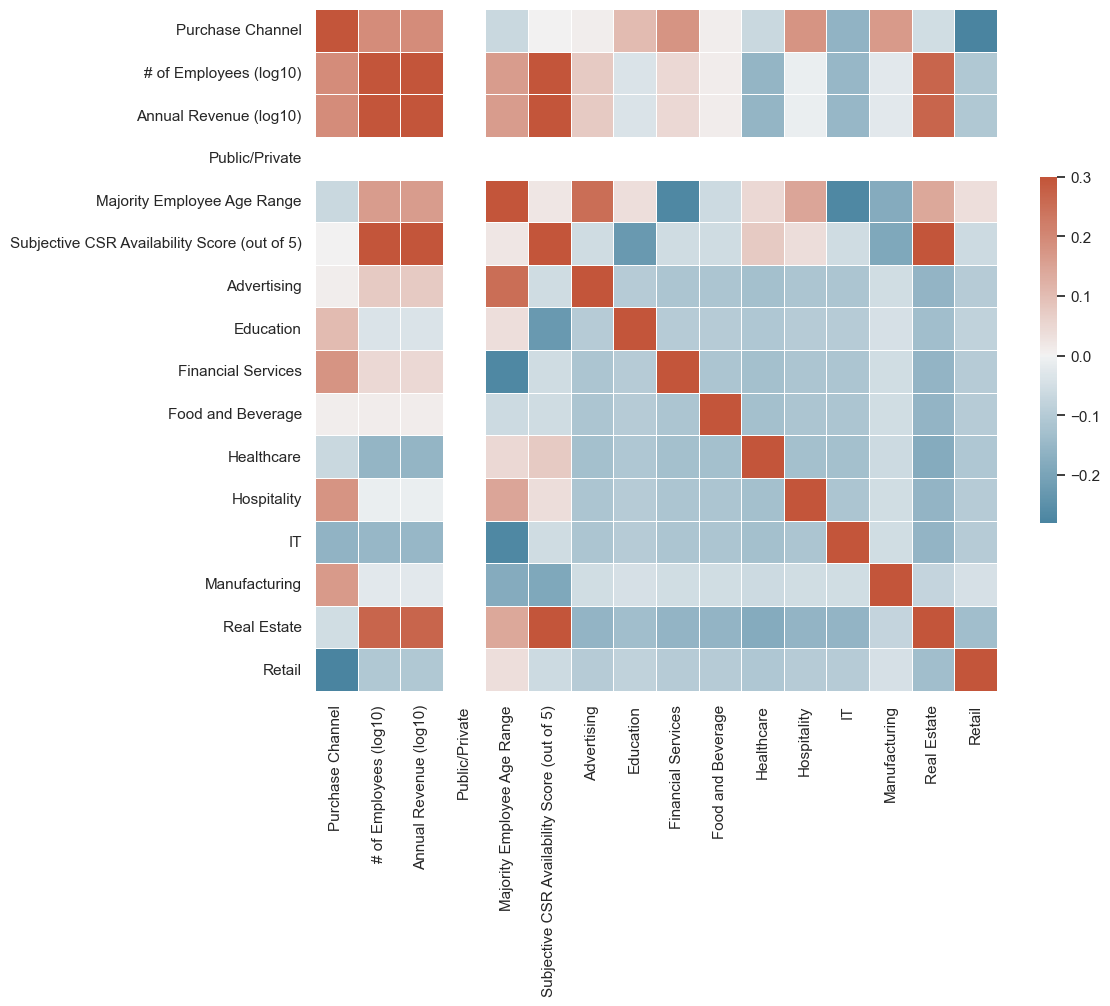

In [272]:
from string import ascii_letters
import seaborn as sns

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()
print(corr['Purchase Channel'])

# Generate a mask for the upper triangle


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [273]:
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
y = df['Purchase Channel']
X = df.drop('Purchase Channel', axis= 1)
clf = ExtraTreesClassifier(n_estimators=5)
clf = clf.fit(X, y)
clf.feature_importances_  


array([0.18442139, 0.16753625, 0.        , 0.0969316 , 0.18386714,
       0.03686105, 0.02246491, 0.02938471, 0.02175867, 0.00835458,
       0.03526817, 0.03164017, 0.00645432, 0.10098445, 0.07407259])

In [274]:
X

,# of Employees (log10),Annual Revenue (log10),Public/Private,Majority Employee Age Range,Subjective CSR Availability Score (out of 5),Advertising,Education,Financial Services,Food and Beverage,Healthcare,Hospitality,IT,Manufacturing,Real Estate,Retail
0,2.176091,2.1761,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.653213,1.6532,1,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.602060,1.6021,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.698970,1.6990,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.845098,1.8451,1,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2.778151,2.7782,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.176091,1.1761,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2.875061,2.8751,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.247973,2.2480,1,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,1.0000,1,0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [275]:
X_new = X[['# of Employees (log10)','Annual Revenue (log10)', 'Majority Employee Age Range', 'Subjective CSR Availability Score (out of 5)']]

X_new


,# of Employees (log10),Annual Revenue (log10),Majority Employee Age Range,Subjective CSR Availability Score (out of 5)
0,2.176091,2.1761,0,0
1,1.653213,1.6532,2,0
2,1.602060,1.6021,1,0
3,1.698970,1.6990,1,1
4,1.845098,1.8451,0,3
5,2.778151,2.7782,0,2
6,1.176091,1.1761,2,0
7,2.875061,2.8751,1,0
8,2.247973,2.2480,2,0
9,1.000000,1.0000,0,3


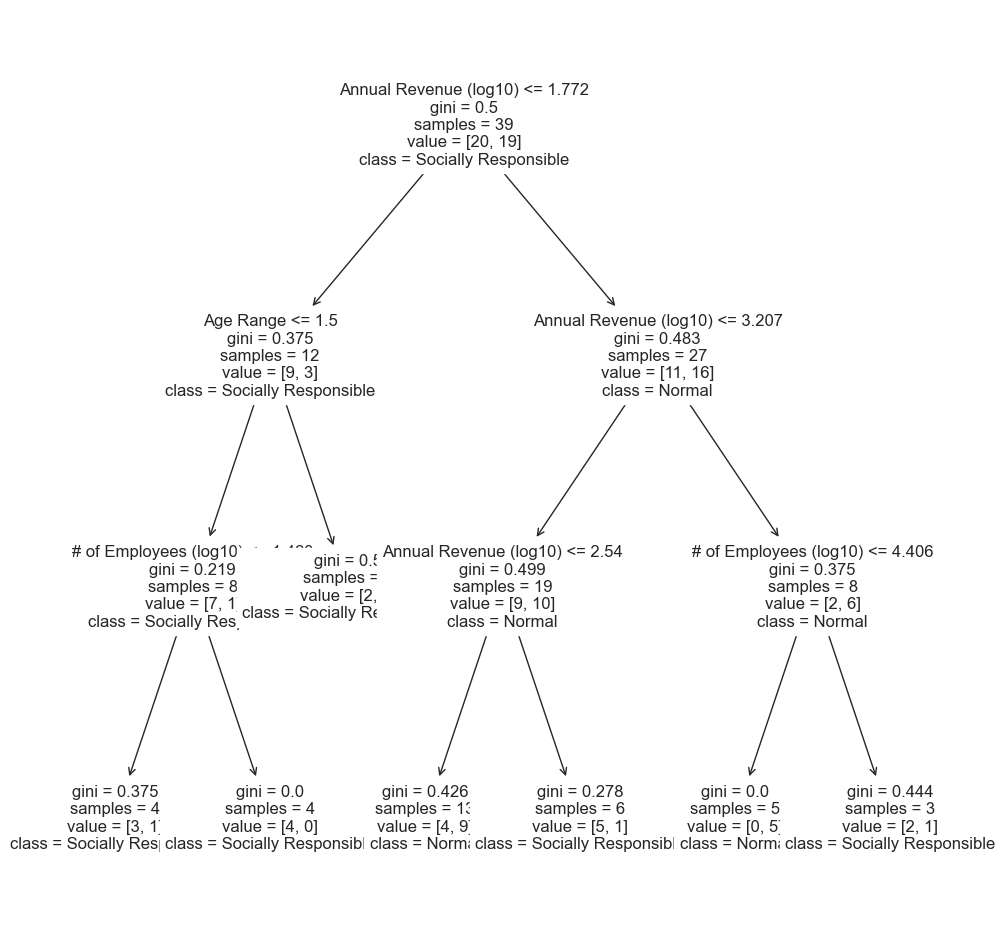

In [276]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 3, min_samples_split=5, max_depth = 3)
clf = clf.fit(X_new, y)
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=12, feature_names = ['# of Employees (log10)','Annual Revenue (log10)', 'Age Range', 'CSR Score (out of 5)'], class_names=['Socially Responsible', 'Normal'], label='all')
plt.show()